## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_df = application_df  #remame df for ease of use
app_df = app_df.drop(columns = ['EIN', 'NAME'])
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
app_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
value_counts = app_df["APPLICATION_TYPE"].value_counts()
value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(value_counts.iloc[8:].index)
cutoff_value=528

# Replace in dataframe
for app in application_types_to_replace:
    app_df['APPLICATION_TYPE'] = app_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
app_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_types = app_df['CLASSIFICATION'].value_counts()
class_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_types_2 = class_types.loc[class_types>1]
class_types_2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_types.iloc[5:].index)
cutoff_value=1888

# Replace in dataframe
for cls in classifications_to_replace:
    app_df['CLASSIFICATION'] = app_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
app_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(app_df)
dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = dummies.drop(columns="IS_SUCCESSFUL").values
y = dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model - 1st attempt

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 80
hidden_nodes_layers2 = 80
hidden_nodes_layers3 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, input_dim=number_input_features, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers3, input_dim=number_input_features, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 16561 (64.69 KB)
Trainable params: 16561 (64.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_nn = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 0s 433us/step - loss: 0.5690 - accuracy: 0.7217
Epoch 2/100
804/804 [==============================] - 0s 431us/step - loss: 0.5549 - accuracy: 0.7271
Epoch 3/100
804/804 [==============================] - 0s 436us/step - loss: 0.5528 - accuracy: 0.7301
Epoch 4/100
804/804 [==============================] - 0s 428us/step - loss: 0.5499 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 0s 427us/step - loss: 0.5493 - accuracy: 0.7304
Epoch 6/100
804/804 [==============================] - 0s 426us/step - loss: 0.5489 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 0s 426us/step - loss: 0.5476 - accuracy: 0.7313
Epoch 8/100
804/804 [==============================] - 0s 427us/step - loss: 0.5472 - accuracy: 0.7326
Epoch 9/100
804/804 [==============================] - 0s 426us/step - loss: 0.5463 - accuracy: 0.7334
Epoch 10/100
804/804 [==============================] - 0s 427us/step - l

804/804 [==============================] - 0s 429us/step - loss: 0.5340 - accuracy: 0.7390
Epoch 80/100
804/804 [==============================] - 0s 427us/step - loss: 0.5344 - accuracy: 0.7390
Epoch 81/100
804/804 [==============================] - 0s 428us/step - loss: 0.5338 - accuracy: 0.7394
Epoch 82/100
804/804 [==============================] - 0s 425us/step - loss: 0.5341 - accuracy: 0.7402
Epoch 83/100
804/804 [==============================] - 0s 426us/step - loss: 0.5338 - accuracy: 0.7396
Epoch 84/100
804/804 [==============================] - 0s 427us/step - loss: 0.5336 - accuracy: 0.7392
Epoch 85/100
804/804 [==============================] - 0s 432us/step - loss: 0.5345 - accuracy: 0.7390
Epoch 86/100
804/804 [==============================] - 0s 428us/step - loss: 0.5339 - accuracy: 0.7390
Epoch 87/100
804/804 [==============================] - 0s 428us/step - loss: 0.5334 - accuracy: 0.7405
Epoch 88/100
804/804 [==============================] - 0s 426us/step - loss:

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5718 - accuracy: 0.7319 - 108ms/epoch - 404us/step
Loss: 0.5718156099319458, Accuracy: 0.7318950295448303


# Model  - 2nd Attempt  -rbf activation

In [16]:
#Custom rbf_activation(x):
def rbf_activation(X):
    return tf.exp(-tf.square(X))


# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 120
hidden_nodes_layers2 = 120
hidden_nodes_layers3 = 120


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation=rbf_activation))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, input_dim=number_input_features, activation=rbf_activation))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers3, input_dim=number_input_features, activation=rbf_activation))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 120)               5280      
                                                                 
 dense_5 (Dense)             (None, 120)               14520     
                                                                 
 dense_6 (Dense)             (None, 120)               14520     
                                                                 
 dense_7 (Dense)             (None, 1)                 121       
                                                                 
Total params: 34441 (134.54 KB)
Trainable params: 34441 (134.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_nn = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 540us/step - loss: 0.5816 - accuracy: 0.7050
Epoch 2/100
804/804 [==============================] - 0s 540us/step - loss: 0.5578 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 0s 536us/step - loss: 0.5552 - accuracy: 0.7295
Epoch 4/100
804/804 [==============================] - 0s 539us/step - loss: 0.5534 - accuracy: 0.7288
Epoch 5/100
804/804 [==============================] - 0s 538us/step - loss: 0.5494 - accuracy: 0.7292
Epoch 6/100
804/804 [==============================] - 0s 544us/step - loss: 0.5488 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 0s 540us/step - loss: 0.5475 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 0s 540us/step - loss: 0.5455 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 0s 540us/step - loss: 0.5442 - accuracy: 0.7349
Epoch 10/100
804/804 [==============================] - 0s 537us/step - l

804/804 [==============================] - 0s 533us/step - loss: 0.5345 - accuracy: 0.7381
Epoch 80/100
804/804 [==============================] - 0s 540us/step - loss: 0.5332 - accuracy: 0.7379
Epoch 81/100
804/804 [==============================] - 0s 534us/step - loss: 0.5328 - accuracy: 0.7374
Epoch 82/100
804/804 [==============================] - 0s 536us/step - loss: 0.5325 - accuracy: 0.7389
Epoch 83/100
804/804 [==============================] - 0s 541us/step - loss: 0.5324 - accuracy: 0.7374
Epoch 84/100
804/804 [==============================] - 0s 538us/step - loss: 0.5336 - accuracy: 0.7387
Epoch 85/100
804/804 [==============================] - 0s 543us/step - loss: 0.5333 - accuracy: 0.7376
Epoch 86/100
804/804 [==============================] - 0s 541us/step - loss: 0.5331 - accuracy: 0.7388
Epoch 87/100
804/804 [==============================] - 0s 541us/step - loss: 0.5331 - accuracy: 0.7397
Epoch 88/100
804/804 [==============================] - 0s 542us/step - loss:

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5668 - accuracy: 0.7310 - 119ms/epoch - 446us/step
Loss: 0.5667972564697266, Accuracy: 0.7309620976448059


# 3rd - Attempt: Use Random Forest to Improve Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [21]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [22]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# Get the feature names from your dataset (assuming it's a pandas DataFrame)
#feature_names = X.columns

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X), reverse=True)

[(0.4046098308473935,
  array([     1, 108590,      0,      0,      0,      1,      0,      0,
              0,      0,      0,      0,      0,      1,      0,      0,
              0,      0,      0,      1,      0,      0,      0,      0,
              0,      0,      1,      0,      0,      1,      0,      0,
              0,      1,      0,      0,      0,      0,      0,      0,
              0,      1,      0])),
 (0.12686350915205422,
  array([     1, 165593,      0,      0,      0,      1,      0,      0,
              0,      0,      0,      0,      0,      1,      0,      0,
              0,      0,      0,      1,      0,      0,      0,      0,
              0,      0,      1,      0,      0,      0,      0,      1,
              0,      0,      0,      1,      0,      0,      0,      0,
              0,      1,      0])),
 (0.1257352679339271,
  array([   1, 5301,    0,    0,    0,    1,    0,    0,    0,    0,    0,
            0,    0,    1,    0,    0,    0,    0,    0,

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

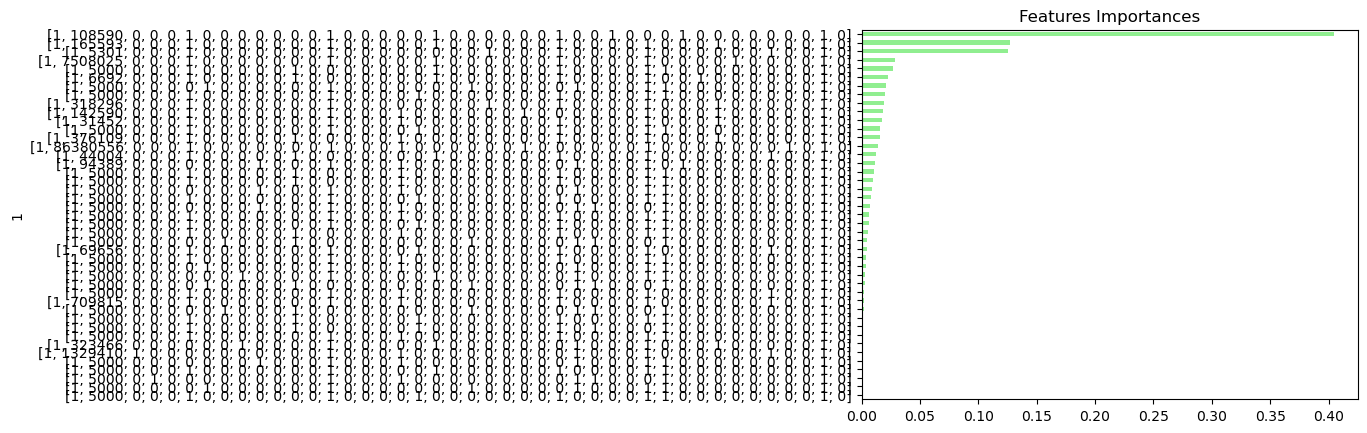

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# 3rd Attempt: Drop more columns before running model

In [25]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(value_counts.iloc[5:].index)
cutoff_value=1065

# Replace in dataframe
for app in application_types_to_replace:
    app_df['APPLICATION_TYPE'] = app_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
app_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_types.iloc[4:].index)
cutoff_value=1918

# Replace in dataframe
for cls in classifications_to_replace:
    app_df['CLASSIFICATION'] = app_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
app_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     4144
C3000     1918
Name: CLASSIFICATION, dtype: int64

In [27]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(app_df)
dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [28]:
# Split our preprocessed data into our features and target arrays
X = dummies.drop(columns="IS_SUCCESSFUL").values
y = dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
#Custom rbf_activation(x):
def rbf_activation(X):
    return tf.exp(-tf.square(X))


# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layers1 = 120
hidden_nodes_layers2 = 120
hidden_nodes_layers3 = 120
hidden_nodes_layers4 = 120

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers1, input_dim=number_input_features, activation=rbf_activation))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers2, input_dim=number_input_features, activation=rbf_activation))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers3, input_dim=number_input_features, activation=rbf_activation))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layers4, input_dim=number_input_features, activation=rbf_activation))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 120)               4800      
                                                                 
 dense_14 (Dense)            (None, 120)               14520     
                                                                 
 dense_15 (Dense)            (None, 120)               14520     
                                                                 
 dense_16 (Dense)            (None, 120)               14520     
                                                                 
 dense_17 (Dense)            (None, 1)                 121       
                                                                 
Total params: 48481 (189.38 KB)
Trainable params: 48481 (189.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Train the model
fit_nn = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 654us/step - loss: 0.5424 - accuracy: 0.7360
Epoch 2/100
804/804 [==============================] - 1s 636us/step - loss: 0.5428 - accuracy: 0.7356
Epoch 3/100
804/804 [==============================] - 1s 636us/step - loss: 0.5423 - accuracy: 0.7359
Epoch 4/100
804/804 [==============================] - 1s 637us/step - loss: 0.5426 - accuracy: 0.7357
Epoch 5/100
804/804 [==============================] - 1s 635us/step - loss: 0.5430 - accuracy: 0.7357
Epoch 6/100
804/804 [==============================] - 1s 639us/step - loss: 0.5424 - accuracy: 0.7353
Epoch 7/100
804/804 [==============================] - 1s 640us/step - loss: 0.5423 - accuracy: 0.7362
Epoch 8/100
804/804 [==============================] - 1s 640us/step - loss: 0.5416 - accuracy: 0.7361
Epoch 9/100
804/804 [==============================] - 1s 641us/step - loss: 0.5417 - accuracy: 0.7353
Epoch 10/100
804/804 [==============================] - 1s 640us/step - l

804/804 [==============================] - 1s 643us/step - loss: 0.5433 - accuracy: 0.7353
Epoch 80/100
804/804 [==============================] - 1s 638us/step - loss: 0.5424 - accuracy: 0.7358
Epoch 81/100
804/804 [==============================] - 1s 640us/step - loss: 0.5433 - accuracy: 0.7344
Epoch 82/100
804/804 [==============================] - 1s 638us/step - loss: 0.5425 - accuracy: 0.7330
Epoch 83/100
804/804 [==============================] - 1s 640us/step - loss: 0.5416 - accuracy: 0.7357
Epoch 84/100
804/804 [==============================] - 1s 639us/step - loss: 0.5425 - accuracy: 0.7353
Epoch 85/100
804/804 [==============================] - 1s 642us/step - loss: 0.5429 - accuracy: 0.7348
Epoch 86/100
804/804 [==============================] - 1s 640us/step - loss: 0.5442 - accuracy: 0.7341
Epoch 87/100
804/804 [==============================] - 1s 639us/step - loss: 0.5418 - accuracy: 0.7361
Epoch 88/100
804/804 [==============================] - 1s 636us/step - loss:

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5770 - accuracy: 0.7315 - 131ms/epoch - 489us/step
Loss: 0.5769781470298767, Accuracy: 0.7315452098846436


In [ ]:
#Relu - 3rd
#268/268 - 0s - loss: 0.6177 - accuracy: 0.7306 - 115ms/epoch - 430us/step
#Loss: 0.6176603436470032, Accuracy: 0.7306122183799744

#rbf - 3rd
#268/268 - 0s - loss: 0.5770 - accuracy: 0.7315 - 131ms/epoch - 489us/step
#Loss: 0.5769781470298767, Accuracy: 0.7315452098846436

# Attempt #4 - using XGBoost

In [42]:
%pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

Note: you may need to restart the kernel to use updated packages.


In [65]:
# XGB Model
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=8, objective='multi:softmax', num_class=40)

In [66]:
#fit XGB Model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=40,
              num_parallel_tree=None, ...)

In [67]:
#Make XGB predictions
predictions = xgb_model.predict(X_test)

In [68]:
#Evaluate XGB model
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score: 0.7301457725947522
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      3974
           1       0.73      0.78      0.76      4601

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575



# Conclusion: 
1. Starter model reported 0.7322 accuracy and 0.5607 loss. Model had 2 layers with 8 and 5 units each and used 'relu' for activation. 
2. Attempt #1 reported 0.7319 accuracy and 0.5718 loss. Model had 3 layers with 80 units each and used 'relu' for activation. 
3. Attempt #2 reported 0.7310 accuracy and 0.5668 loss. Model had 3 layers with 120 units each and used 'rbf' for activation. 
4. Attempt #3 reported 0.7315 accuracy and 0.5770 loss. Model X factors were regrouped to reduce the number of unique application and class types. Model had 4 layers with 120 units each and used 'rbf' for activation. 
5. Attempt #4 was supervised machine learning that used XGBClassifier and reported 0.7301 accuracy. The f1-score was 0.70 for the 0 group and 0.76 for the 1 group. Precision scores were 0.73 for both groups and recall scores were 0.67 and 0.78 respectively. 

Conclusion: Including the starter model, all attempts reported accuracy within a tight range of 0.7310 to 0.7322 and loss rates ranged from 0.5607 to 0.5770. It did not appear that increasing the number of hidden layer or number of neurons increased the accuracy of the model. Furthermore, it appeared that the 'relu' activation was nominally a better fit than the rbf activation for the model. Attempt #4 showed that the accuracy between group 0 and group 1 varied by 0.06, and group 1 reported a recall score 0.12 higher than group 0. This suggests that the data itself is the key to achieving a higher accuracy score. Plotting and understanding the relationship between the parts of the data set with the largest number of data points could perhaps yield a model design that produces an accuracy score in excess of 73%. 

In [69]:
nn.save("charity_code_ optimized.h5")

/Users/ryak/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
